In [124]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [134]:
texts = [
    "I love this product!", 
    "This is the worst thing I've ever bought.", 
    "It's okay, not great but not terrible.",
    "Absolutely fantastic!", 
    "I hate it.",
    "Not bad, could be better.",
    "This is amazing, exceeded my expectations.",
    "Terrible, I want a refund.",
    "Decent product for the price.",
    "Awful, do not buy this!",
    "This item is exactly what I needed, very satisfied.",
    "The quality is poor, I wouldn't recommend it.",
    "It's an alright purchase, nothing special.",
    "Exceeded my expectations, will buy again!",
    "I had high hopes but it didn't meet them.",
    "Better than I expected, good value for money.",
    "Very disappointing, not worth the money.",
    "I'm happy with this purchase, it works great.",
    "Not worth it, it broke after one use.",
    "I am pleased with this item, it does the job.",
    "Terrible experience, would not buy again.",
    "The product is decent, but the shipping was slow.",
    "I'm impressed with the performance, definitely worth buying.",
    "This product is subpar, had issues from the start.",
    "Good quality and fast delivery, very happy.",
    "This was a waste of money, very unhappy.",
    "It's okay, but I've had better products.",
    "I would highly recommend this to others!",
    "The worst purchase I've ever made.",
    "The product is as described, no complaints.",
    "I regret buying this, it's not what I expected.",
    "Fantastic product, I’m extremely satisfied.",
    "It's a decent item for the price.",
    "Very poor quality, will be returning it.",
    "This is an excellent product, I’m very happy.",
    "The product does not match the description.",
    "I’m content with my purchase, everything is fine.",
    "The quality is acceptable for the price.",
    "Absolutely awful, do not waste your money.",
    "This exceeded my expectations in every way."
    
]


labels = [
    2, 0, 1, 2, 0,
    1, 2, 0, 1, 0,
    2, 0, 1, 2, 0,
    2, 0, 2, 0, 1,
    2, 0, 1, 0, 0,
    2, 1, 0, 0, 2,
    0, 0, 2, 0, 1,
    0, 1, 1, 0, 2
    
]


In [135]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=10)

In [136]:
# Encode labels (assuming 0 = negative, 1 = neutral, 2 = positive)
labels = np.array(labels)

In [137]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [138]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=10),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

In [139]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1/1 [==============================] - 1s 689ms/step - loss: 1.0974 - accuracy: 0.3750 - val_loss: 1.1023 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 79ms/step - loss: 1.0954 - accuracy: 0.3750 - val_loss: 1.1029 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 47ms/step - loss: 1.0934 - accuracy: 0.5000 - val_loss: 1.1035 - val_accuracy: 0.1250
Epoch 4/10
1/1 [==============================] - 0s 47ms/step - loss: 1.0915 - accuracy: 0.5625 - val_loss: 1.1041 - val_accuracy: 0.1250
Epoch 5/10
1/1 [==============================] - 0s 47ms/step - loss: 1.0897 - accuracy: 0.5625 - val_loss: 1.1049 - val_accuracy: 0.1250
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 1.0878 - accuracy: 0.5938 - val_loss: 1.1059 - val_accuracy: 0.1250
Epoch 7/10
1/1 [==============================] - 0s 65ms/step - loss: 1.0860 - accuracy: 0.5625 - val_loss: 1.1067 - val_accuracy: 0.1250
Epoch 8/10
1/1 [==========

In [141]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_val, y_pred_classes))

1/1 [==============================] - 0s 79ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.20      1.00      0.33         1

    accuracy                           0.12         8
   macro avg       0.07      0.33      0.11         8
weighted avg       0.03      0.12      0.04         8



C:\Users\ARAVINTH1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARAVINTH1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARAVINTH1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


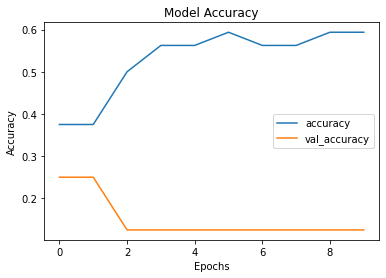

In [142]:
# Visualize the training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

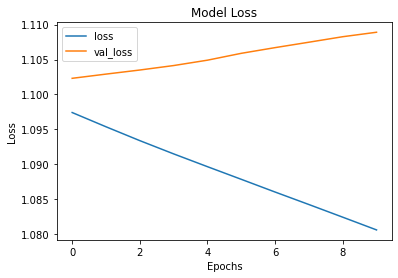

In [143]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
